![head.png](https://github.com/iwh-halle/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework Assignment

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/iwh-halle/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/iwh-halle/FinancialDataAnalytics/discussions



## Part 1: Python basics

### Task:

1. Write a function that calculates the present value as

    $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$

2. Provide a docstring for the function.
3. Print the output for $C_{10} = 100$ and $r = 0.03$. Use string formatting to improve readability.

In [1]:
def pres_val(Ct,r,t):
    """
    Calculate the present value of a cash flow.

    Parameters:
        Ct (float): Cash flow at time t.
        r (float): Interest rate.
        t (int): Time period.

    Returns:
        float: Present value of the cash flow.
    """
    return Ct / ((1+r)**t)

Ct=100
r=0.03
t=10

print(f"The present value of cash flow for Ct= {Ct} with interest rate r= {r} amounts to {pres_val(Ct,r,t):,.2f}")


The present value of cash flow for Ct= 100 with interest rate r= 0.03 amounts to 74.41


### Task:

Plot $\text{PV}(C_t) = \frac{C_t}{(1+r)^t}$, with $C_{10} = 100$, as a function of $r$ for the interval 0 to 25%.

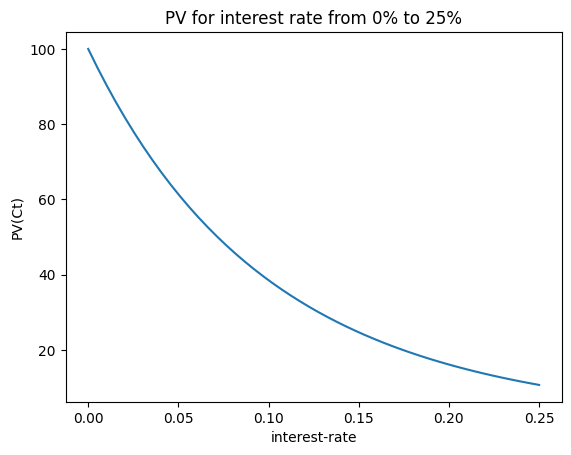

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Ct=100
t=10
r_vals=np.linspace(0, 0.25)

pv_vals=[pres_val(Ct, r, t) for r in r_vals]
plt.plot(r_vals, pv_vals)
plt.ylabel('PV(Ct)')
plt.xlabel('interest-rate')
plt.title('PV for interest rate from 0% to 25%')
plt.show()

### Task:

1. Use a loop to calculate the present value of $[10, 10, 110]$, these payments are made annually over the next three years. The interest rate is flat at $0.05$.
2. Print the discounted cash flow in a readable format.

In [3]:
#Values
ct=[10,10,110]

#Empty list to store output
cv=[]

#Interest rate
r=0.05

#Amount of years
years=3


print(f"The discounted Cash flow with flat interest rate {r} amounts to:\n")

for t in range(years):

    cv.append(pres_val(ct[t],r,t+1))
    
    print(f"Year {t+1}: C{t+1}= {ct[t]}\n value is {cv[t]:,.2f}$\n")

print(f"The total amount is {sum(cv):,.2f}$")

The discounted Cash flow with flat interest rate 0.05 amounts to:

Year 1: C1= 10
 value is 9.52$

Year 2: C2= 10
 value is 9.07$

Year 3: C3= 110
 value is 95.02$

The total amount is 113.62$


## Part 2: Working with data

In this assignment, you will work with financial data from a CSV file and use Python libraries such as NumPy, Pandas, Matplotlib and Seaborn to analyze and visualize the data. The data is stored in a file named 02_python_data.csv, which contains daily stock prices for various companies listed on Deutsche Börse (Xetra). The columns are labeled with Reuters identifier code (RIC). The first RIC '.GDAXI' is the german DAX index, the remaining RICs represent its constituents.

**Save all your visualizations as PNG files with "02_python_" as a prefix, e.g. "02_python_pricechart.png".**

In general, it is a useful practice to prefix output files with the name of the generating script.

### Task: 

1. Load the stock price data into a Pandas data frame called 'prices'.
2. Calculate both arithmetic as well as logarithmic returns for all assets. Store the return data in two separate data frames, named 'returns' and 'logreturns'. 
3. Display the first 5 rows of each data frame.

In [4]:
import pandas as pd
import numpy as np

prices=pd.DataFrame(pd.read_csv('02_python_data.csv',index_col=0))
returns= ((prices-prices.shift(1)) /prices.shift(1)).dropna()
logreturns = np.log(prices / prices.shift(1)).dropna()

print("Prices:")
display(prices.head())
print("\nArithmetic returns:")
display(returns.head())
print("\nLogarithmic returns:")
display(logreturns.head())

Prices:


,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-29,14097.88,97.026932,117.78,17.570,105.50,216.20,67.10,148.94,78.51,51.26,...,66.02,55.26,193.65,6.282,214.8,73.94,37.83,44.04,79.54,41.29
2022-05-02,13939.07,95.982669,115.12,17.290,103.96,215.00,62.22,147.22,77.64,50.22,...,62.46,54.74,187.90,6.204,211.6,72.30,37.74,44.01,77.48,41.41
2022-05-03,14039.47,94.729554,114.56,17.376,106.44,217.00,62.88,150.20,79.98,50.42,...,64.32,55.22,197.10,6.412,222.4,72.18,38.07,44.06,79.58,39.40
2022-05-04,13970.82,92.979171,115.78,17.530,102.68,213.55,62.33,148.52,79.47,51.98,...,63.30,55.42,192.30,6.310,213.1,72.48,37.15,43.34,78.32,40.20
2022-05-05,13902.52,94.699718,116.58,17.592,108.96,199.76,61.00,147.18,78.03,53.06,...,60.54,54.18,189.95,6.188,211.0,71.34,33.21,44.05,77.78,38.75



Arithmetic returns:


,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-02,-0.011265,-0.010763,-0.022584,-0.015936,-0.014597,-0.005550,-0.072727,-0.011548,-0.011081,-0.020289,...,-0.053923,-0.009410,-0.029693,-0.012416,-0.014898,-0.022180,-0.002379,-0.000681,-0.025899,0.002906
2022-05-03,0.007203,-0.013056,-0.004864,0.004974,0.023855,0.009302,0.010608,0.020242,0.030139,0.003982,...,0.029779,0.008769,0.048962,0.033527,0.051040,-0.001660,0.008744,0.001136,0.027104,-0.048539
2022-05-04,-0.004890,-0.018478,0.010649,0.008863,-0.035325,-0.015899,-0.008747,-0.011185,-0.006377,0.030940,...,-0.015858,0.003622,-0.024353,-0.015908,-0.041817,0.004156,-0.024166,-0.016341,-0.015833,0.020305
2022-05-05,-0.004889,0.018505,0.006910,0.003537,0.061161,-0.064575,-0.021338,-0.009022,-0.018120,0.020777,...,-0.043602,-0.022375,-0.012220,-0.019334,-0.009855,-0.015728,-0.106057,0.016382,-0.006895,-0.036070
2022-05-06,-0.016416,-0.037597,-0.016641,-0.016485,-0.014868,-0.020324,0.017705,-0.008969,0.013200,-0.038447,...,0.012884,-0.005906,-0.006054,-0.010989,-0.015166,-0.032520,0.006323,-0.017253,-0.011057,-0.008516



Logarithmic returns:


,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-02,-0.011329,-0.010821,-0.022843,-0.016065,-0.014705,-0.005566,-0.075508,-0.011615,-0.011143,-0.020497,...,-0.055431,-0.009455,-0.030142,-0.012494,-0.015010,-0.022430,-0.002382,-0.000681,-0.026240,0.002902
2022-05-03,0.007177,-0.013142,-0.004876,0.004962,0.023575,0.009259,0.010552,0.020040,0.029694,0.003975,...,0.029344,0.008731,0.047801,0.032977,0.049780,-0.001661,0.008706,0.001135,0.026743,-0.049757
2022-05-04,-0.004902,-0.018651,0.010593,0.008824,-0.035964,-0.016026,-0.008785,-0.011248,-0.006397,0.030471,...,-0.015985,0.003615,-0.024655,-0.016036,-0.042716,0.004148,-0.024463,-0.016476,-0.015960,0.020101
2022-05-05,-0.004901,0.018336,0.006886,0.003531,0.059363,-0.066754,-0.021569,-0.009063,-0.018286,0.020564,...,-0.044581,-0.022629,-0.012296,-0.019524,-0.009903,-0.015853,-0.112113,0.016249,-0.006919,-0.036736
2022-05-06,-0.016553,-0.038322,-0.016781,-0.016622,-0.014979,-0.020534,0.017550,-0.009009,0.013114,-0.039206,...,0.012802,-0.005924,-0.006073,-0.011050,-0.015282,-0.033061,0.006303,-0.017404,-0.011118,-0.008553


### Task:

1. Plot a histogram of DAX returns.
2. Plot both the prices as well as the returns of the DAX in one plot (you need two y axis).

Hint: 
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
* https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

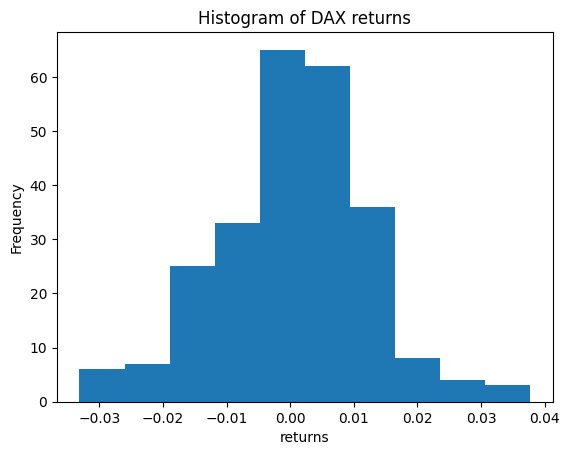

In [5]:
#Task 1 Plot a histogram of DAX returns.
import matplotlib.pyplot as plt

plt.hist(returns[".GDAXI"])
plt.xlabel('returns')
plt.ylabel('Frequency')
plt.title('Histogram of DAX returns')
plt.savefig('02_python_DAX_returns_histogram.png')

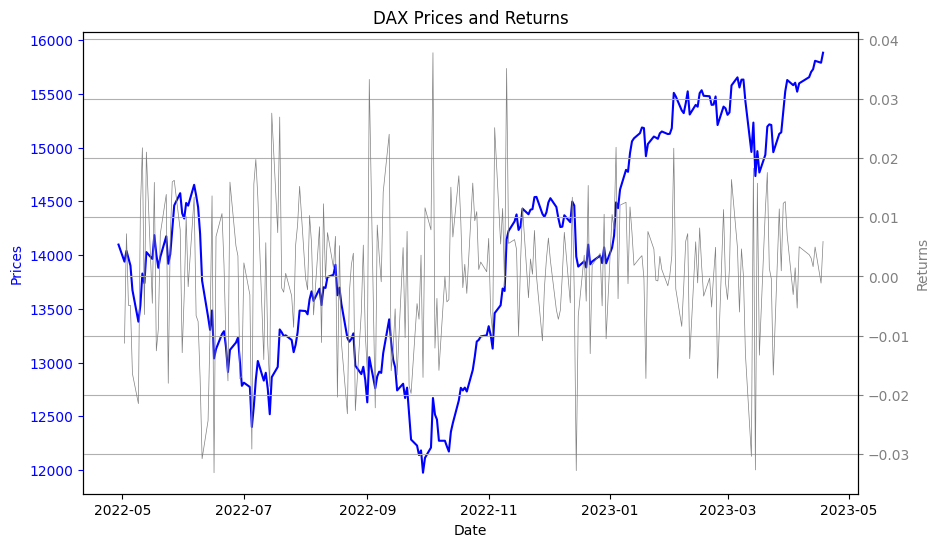

In [13]:
# Task 2: Plot prices and returns of DAX in one plot with two y-axes
fig,ax1=plt.subplots(figsize=(10,6))

ax1.plot(prices['.GDAXI'],color='b')
ax1.set_xlabel('Date')
ax1.set_ylabel('Prices',color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(returns['.GDAXI'],color='grey',linewidth=0.5)
ax2.set_ylabel('Returns', color='grey')
ax2.tick_params('y', colors='grey')

plt.title('DAX Prices and Returns')
plt.grid(True)
plt.savefig('02_python_DAX_prices_returns.png')
plt.show()



### Task:

Which company had the highest average stock return during the time period covered by the data?

In [7]:
max_avg_ret_comp=returns.mean().idxmax()
max_avg_ret=returns.mean().max()

print(f"The company with the highest average stock return during the time period is {max_avg_ret_comp} with an average return of {max_avg_ret*100:,.5f}% ")

The company with the highest average stock return during the time period is CBKG.DE with an average return of 0.24368% 


### Task:

Plot a [heat map](https://en.wikipedia.org/wiki/Heat_map) of the [correlations](https://en.wikipedia.org/wiki/Correlation) between the arithmetic returns of the first 10 assets (i.e. first 10 columns).

Hint:
* `returns.iloc[:10,:10]` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html
* `returns.iloc[:10,:10].corr()` see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html
* `sns.heatmap()` see https://seaborn.pydata.org/generated/seaborn.heatmap.html

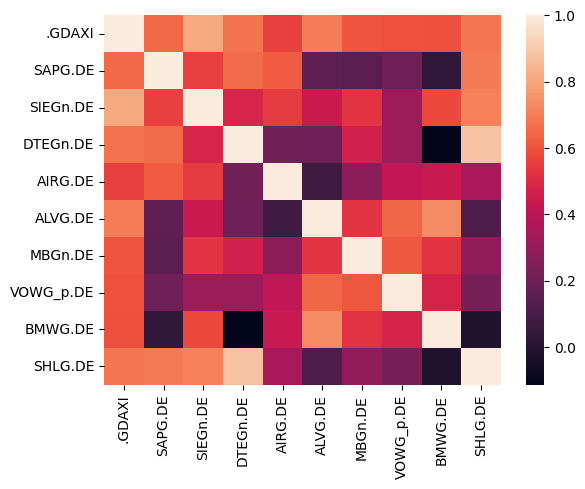

In [8]:
import seaborn as sns
sns.heatmap(returns.iloc[:10,:10].corr())
plt.savefig('02_python_corr_heatmap.png')

### Task:

Considering all assets in the data, pick two pairs of stocks: 
1. the pair with the highest correlation and 
2. the pair with the lowest correlation. 
3. Create [scatter plots](https://en.wikipedia.org/wiki/Scatter_plot) for both pairs.

Minimum correlation: 0.0139 between QIA.DE and CBKG.DE
Maximum correlation: 0.8564 between SIEGn.DE and .GDAXI


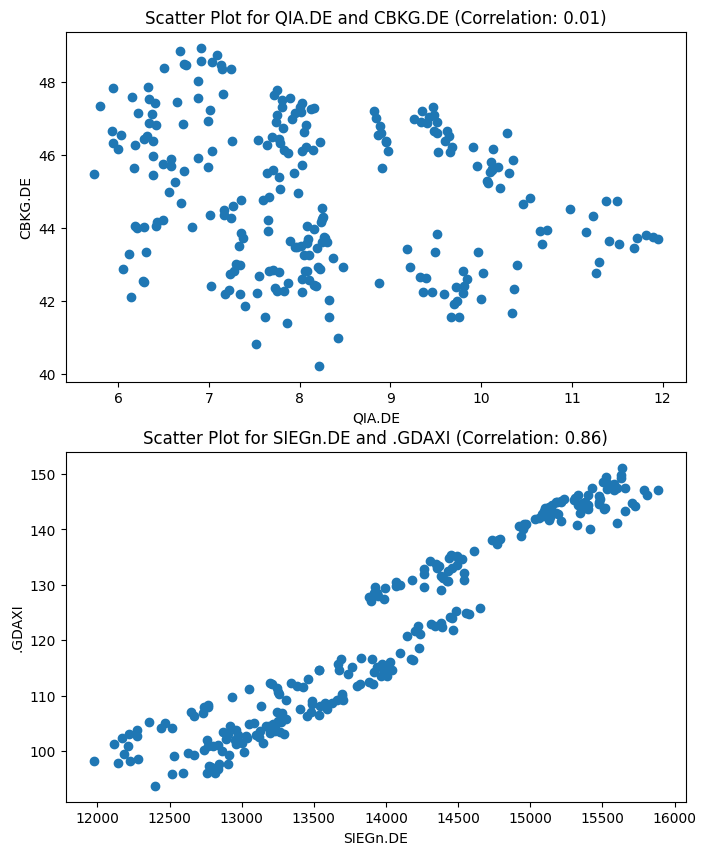

In [9]:
corr_matrix=pd.DataFrame(returns.corr())
min=1
min_pos=[]
max=0
max_pos=[]

for i in range(len(corr_matrix)):
    for j in range(i+1,len(corr_matrix)):
        if corr_matrix.iloc[i,j]<=min:
            min=corr_matrix.iloc[i,j]
            min_pos=[i,j]
        if corr_matrix.iloc[i,j]>=max:
            max=corr_matrix.iloc[i,j]
            max_pos=[i,j]


print(f"Minimum correlation: {min:,.4f} between {corr_matrix.columns[min_pos[1]]} and {corr_matrix.columns[min_pos[0]]}")
print(f"Maximum correlation: {max:,.4f} between {corr_matrix.columns[max_pos[1]]} and {corr_matrix.columns[max_pos[0]]}")

plt.figure(figsize=(8, 10))

plt.subplot(2,1,1)
plt.title(f'Scatter Plot for {corr_matrix.columns[min_pos[1]]} and {corr_matrix.columns[min_pos[0]]} (Correlation: {min:.2f})')
plt.xlabel(corr_matrix.columns[min_pos[1]])
plt.ylabel(corr_matrix.columns[min_pos[0]])
plt.scatter(prices[corr_matrix.columns[min_pos[0]]],prices[corr_matrix.columns[min_pos[1]]])


plt.subplot(2,1,2)
plt.title(f'Scatter Plot for {corr_matrix.columns[max_pos[1]]} and {corr_matrix.columns[max_pos[0]]} (Correlation: {max:.2f})')
plt.xlabel(corr_matrix.columns[max_pos[1]])
plt.ylabel(corr_matrix.columns[max_pos[0]])
plt.scatter(prices[corr_matrix.columns[max_pos[0]]],prices[corr_matrix.columns[max_pos[1]]])
plt.savefig('02_python_min_max_correlated_assets.png')



### Task:

1. Calculate the annualized [volatility](https://en.wikipedia.org/wiki/Volatility_(finance)) and [return](https://en.wikipedia.org/wiki/Rate_of_return) of each asset in the dataset. Assume there are 252 trading days in a year. (Use log-returns!)
2. Also calculate the [Sharpe ratio](https://en.wikipedia.org/wiki/Sharpe_ratio) for each asset, assuming a risk free rate of $0.5\%$ p.a..

In [10]:
annualized_volatility=logreturns.std()*np.sqrt(252)

annualized_return=logreturns.mean()*252

sharpe_ratio=(annualized_return - 0.005)/annualized_volatility

print("Annualized Volatility:")
display(annualized_volatility.head())
print("\nAnnualized Return:")
display(annualized_return[5:10])
print("\nSharpe Ratio:")
display(sharpe_ratio[10:15])

Annualized Volatility:


.GDAXI      0.192007
SAPG.DE     0.243553
SIEGn.DE    0.313924
DTEGn.DE    0.169142
AIRG.DE     0.299162
dtype: float64


Annualized Return:


ALVG.DE      0.013023
MBGn.DE      0.045276
VOWG_p.DE   -0.164629
BMWG.DE      0.285525
SHLG.DE      0.046686
dtype: float64


Sharpe Ratio:


BAYGn.DE   -0.099605
DPWGn.DE    0.193586
IFXGn.DE    0.708644
MUVGn.DE    1.618751
BASFn.DE   -0.008485
dtype: float64

### Task:

As you can see, we are using daily data so far. Re-sample the data to monthly frequency and plot monthly prices for 'BMWG.DE'.

Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html

I choose to resample the monthly data with the respective mean of the month. Since our returns and log returns are provided in percent, I think this provides an inspector of this data with the biggest amount of useful information. 

The last datapoint of each month could also be usefull, but since we would ignore every other datapoint in the month, we would loose a lot of information like this imo.

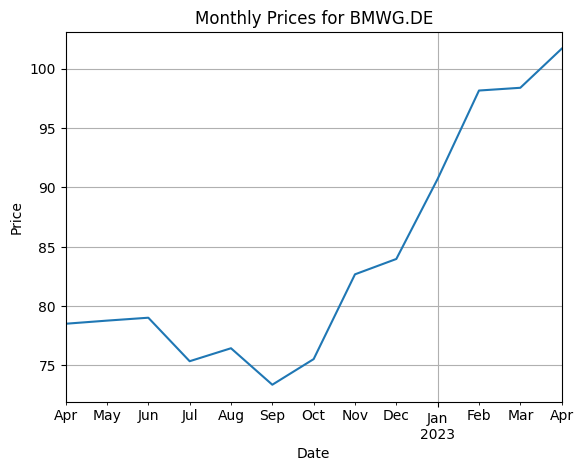

,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
Date,,,,,,,,,,,,,,,,,,,,,
2022-04-30,14097.880000,97.026932,117.780000,17.570000,105.500000,216.200000,67.100000,148.940000,78.510000,51.260000,...,66.020000,55.260000,193.650000,6.282000,214.800000,73.940000,37.830000,44.040000,79.540000,41.290000
2022-05-31,13991.862273,92.700138,116.113636,18.097182,106.767273,200.496364,63.621364,147.397273,78.773182,53.574545,...,65.467273,53.468182,183.813636,6.943091,194.681818,70.582727,35.163182,43.213636,74.774545,40.145000
2022-06-30,13601.011364,90.696364,110.736818,18.620636,99.260909,186.570909,63.066818,147.015455,79.017727,49.733636,...,71.151818,50.685909,177.204545,7.792636,210.604545,67.650000,29.093636,42.628636,70.618182,38.499545
2022-07-31,12981.405238,88.286190,100.950476,18.849238,100.618095,176.032381,54.189048,131.375238,75.354286,48.592381,...,67.341905,47.094286,181.450000,6.242000,188.433333,63.200000,26.613333,46.745238,66.354286,32.660952
2022-08-31,13449.552174,90.215652,107.132174,18.812435,104.778696,175.973913,58.401739,144.345217,76.446957,50.043913,...,64.075652,48.656087,188.710870,6.765826,170.743478,68.475652,27.640870,47.589565,70.000870,31.673478


,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-31,0.004352,0.007304,0.004414,0.004455,0.010161,0.005715,0.005541,0.001245,0.006144,0.002596,...,0.006605,0.006558,0.007875,0.004869,0.002227,-0.000378,0.007548,0.001025,-0.001114,0.007700
2022-11-30,0.003822,0.003211,0.008031,0.000622,0.000009,0.005315,0.004600,0.003762,0.003908,0.004036,...,0.004517,0.005195,0.004672,-0.000283,0.008035,-0.000762,0.012318,0.003764,0.001536,0.005108
2022-12-31,-0.001538,-0.003734,-0.000490,-0.001888,0.000972,-0.000769,-0.002170,-0.008345,-0.001604,-0.003640,...,-0.000957,0.001114,0.000482,0.005029,-0.001758,-0.000142,0.005669,-0.000273,-0.006054,-0.001957
2023-01-31,0.003807,0.005407,0.004510,0.004252,0.001485,0.004012,0.004860,0.004023,0.005157,0.002327,...,0.006590,0.007601,0.005699,0.007863,0.006647,0.006273,0.011918,-0.002282,0.003096,0.006679
2023-02-28,0.000812,-0.000355,0.000822,0.001915,0.003975,0.000704,0.003306,0.000966,0.002445,0.000606,...,0.003018,0.001885,0.000094,0.005412,0.006027,0.002299,-0.005856,-0.001198,-0.000818,-0.000440


,.GDAXI,SAPG.DE,SIEGn.DE,DTEGn.DE,AIRG.DE,ALVG.DE,MBGn.DE,VOWG_p.DE,BMWG.DE,SHLG.DE,...,CONG.DE,HEIG.DE,MTXGn.DE,CBKG.DE,RHMG.DE,BNRGn.DE,ZALG.DE,QIA.DE,PSHG_p.DE,1COV.DE
Date,,,,,,,,,,,,,,,,,,,,,
2022-12-31,-0.001538,-0.003734,-0.000490,-0.001888,0.000972,-0.000769,-0.002170,-0.008345,-0.001604,-0.003640,...,-0.000957,0.001114,0.000482,0.005029,-0.001758,-0.000142,0.005669,-0.000273,-0.006054,-0.001957
2023-01-31,0.003807,0.005407,0.004510,0.004252,0.001485,0.004012,0.004860,0.004023,0.005157,0.002327,...,0.006590,0.007601,0.005699,0.007863,0.006647,0.006273,0.011918,-0.002282,0.003096,0.006679
2023-02-28,0.000812,-0.000355,0.000822,0.001915,0.003975,0.000704,0.003306,0.000966,0.002445,0.000606,...,0.003018,0.001885,0.000094,0.005412,0.006027,0.002299,-0.005856,-0.001198,-0.000818,-0.000440
2023-03-31,0.000838,0.003451,0.001591,0.002252,-0.000008,-0.001733,-0.001006,-0.000827,0.001483,0.003218,...,0.001026,0.001642,0.000579,-0.006497,0.005906,-0.001266,0.001410,-0.001643,-0.000425,-0.003504
2023-04-30,0.001619,0.000579,-0.001308,0.000541,0.003947,0.002902,-0.000776,0.000778,0.003167,0.001273,...,0.001289,0.005131,0.005323,0.006648,-0.001068,0.004732,-0.002309,-0.000548,-0.001281,-0.000492


In [11]:
#Index as DateTimeIndex
prices.index = pd.to_datetime(prices.index)
returns.index=pd.to_datetime(returns.index)
logreturns.index=pd.to_datetime(logreturns.index)

#Refactor data
monthly_prices=prices.resample('ME').mean()
monthly_returns=returns.resample('ME').mean()
monthly_logreturns=returns.resample('ME').mean()

#Plot Monthly Prices for BMWG.DE
monthly_prices['BMWG.DE'].plot()
plt.title('Monthly Prices for BMWG.DE')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.savefig('02_python_monthly_prices_BMW.png')
plt.show()

#Display Sample of monthly data
display(monthly_prices[0:5])
display(monthly_returns[5:10])
display(monthly_logreturns[7:12])